In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [2]:
# Load the MNIST data.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num1 = 0
num2 = 1
x_train_sample = []
y_train_sample = []
train_samples = 200

for i in range(len(X_train)):
    if y_train[i] == num1 or y_train[i] == num2:
        x_train_sample.append(X_train[i])
        y_train_sample.append(y_train[i])
    if len(x_train_sample) >= train_samples:
        break

x_test_sample = []
y_test_sample = []
i_test_sample = []
samples = 500

for i in range(len(X_test)):
    if y_test[i] == num1 or y_test[i] == num2:
        x_test_sample.append(X_test[i])
        y_test_sample.append(y_test[i])
        i_test_sample.append(i)
    if len(x_test_sample) >= samples:
        break
        
print(np.array(x_train_sample).shape)
print(np.array(x_test_sample).shape)

(200, 28, 28)
(500, 28, 28)


In [3]:
#### FLAT MODEL ####
from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense, Convolutional, Flatten

network = GWUNetwork()
network.add(Flatten(28,input_channels=1))
network.add(Dense(20, activation='relu'))
network.add(Dense(1, add_bias=False, activation='sigmoid'))

# Finally to complete our model we need to compile it. This defines our loss function and learning_rate
network.compile(loss='log_loss', lr=0.001)
print(network)
network.fit(x_train_sample, y_train_sample, epochs=1)

Model:
Flatten - (28, 784)
Dense - (784, 20)
Dense - (20, 1)

epoch 1/1   error=nan


/mnt/d/sync/gw/fall2021/csci6907_neural_networks/gwu_nn/gwu_nn/loss_functions.py:34: RuntimeWarning: divide by zero encountered in log
  return np.mean(-np.log(y_pred)*y_true + -np.log(1-y_pred)*(1-y_true))
/mnt/d/sync/gw/fall2021/csci6907_neural_networks/gwu_nn/gwu_nn/loss_functions.py:34: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-np.log(y_pred)*y_true + -np.log(1-y_pred)*(1-y_true))


In [4]:
# Predict using the test set.
raw_predictions = network.predict(x_test_sample)


predictions = [round(x[0][0]) for x in raw_predictions]
actual = [y for y in y_test_sample]
count = 0
for p,a in zip(predictions,actual):
    if p == a:
        count += 1
print("accuracy: " + str(100 * count/len(predictions)))

# show figures where it messed up

accuracy: 79.6


In [5]:
#### CNN MODEL ####

np.random.seed(1)
np.random.RandomState(1)

from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense, Convolutional, Flatten, MaxPool

network = GWUNetwork()
network.add(Convolutional(input_size=28, input_channels=1, kernel_size=3, num_kernels=1, activation='relu'))
network.add(MaxPool(28,2)) # works better without pooling
network.add(Flatten(14,input_channels=1)) # input size = 28
network.add(Dense(40, activation='relu'))
network.add(Dense(1, add_bias=False, activation='sigmoid'))

# Finally to complete our model we need to compile it. This defines our loss function and learning_rate
network.compile(loss='log_loss', lr=0.001)
print(network)

Model:
Convolutional - (28, 28)
MaxPool - (28, 14)
Flatten - (14, 196)
Dense - (196, 40)
Dense - (40, 1)



In [6]:
network.fit(x_train_sample, y_train_sample, epochs=1)

epoch 1/1   error=nan


In [7]:
# Predict using the test set.
raw_predictions = network.predict(x_test_sample)

# calculate accuracy and show incorrect classifications
predictions = [round(x[0][0]) for x in raw_predictions]
count = 0
for p,a,i in zip(predictions,y_test_sample,i_test_sample):
    if p == a:
        count += 1
    else:
        pass
        #print("Prediction: " + str(p))
        #ax = plt.subplot()
        #plt.imshow(X_test[i], cmap='gray')
        #plt.show()
        
print("accuracy: " + str(100 * count/len(predictions)))
print(predictions)
print(y_test_sample)

accuracy: 89.0
[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 

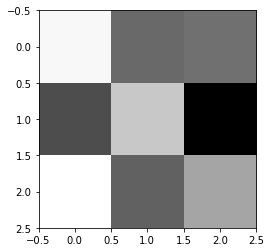

In [8]:
# print out the kernel weights 
kernel = network.layers[0].kernels.reshape(3,3)

plt.imshow(kernel, cmap='gray')